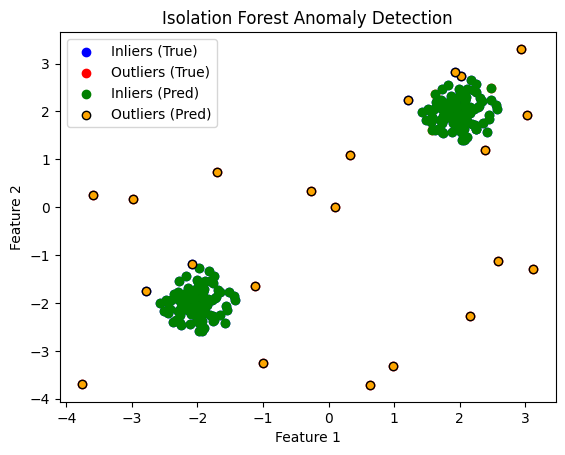

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic data
np.random.seed(42)
# Create inliers (normal data)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Create outliers (anomalous data)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
clf.fit(X)

# Predict anomalies
y_pred = clf.predict(X)

# Separate predictions
X_inliers_pred = X[y_pred == 1]
X_outliers_pred = X[y_pred == -1]

# Plot the data
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue', label='Inliers (True)')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', label='Outliers (True)')
plt.scatter(X_inliers_pred[:, 0], X_inliers_pred[:, 1], c='green', label='Inliers (Pred)')
plt.scatter(X_outliers_pred[:, 0], X_outliers_pred[:, 1], c='orange', label='Outliers (Pred)', edgecolor='k')
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


ExactExplainer explainer: 221it [00:11,  9.31it/s]                         


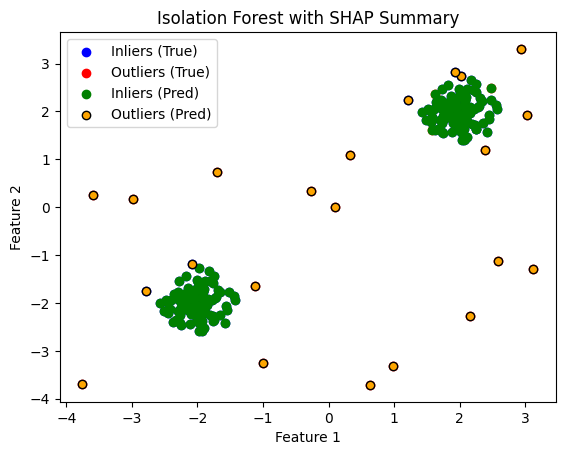

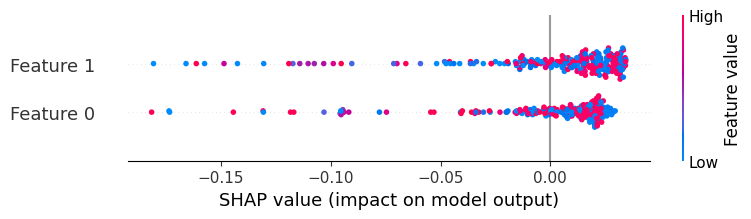

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import shap

# Generate synthetic data
np.random.seed(42)
# Create inliers (normal data)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Create outliers (anomalous data)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
clf.fit(X)

# Predict anomalies
y_pred = clf.predict(X)

# Create SHAP explainer and calculate SHAP values
explainer = shap.Explainer(clf.decision_function, X)
shap_values = explainer(X)

# Separate predictions
X_inliers_pred = X[y_pred == 1]
X_outliers_pred = X[y_pred == -1]

# Plot the data with SHAP summary
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue', label='Inliers (True)')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', label='Outliers (True)')
plt.scatter(X_inliers_pred[:, 0], X_inliers_pred[:, 1], c='green', label='Inliers (Pred)')
plt.scatter(X_outliers_pred[:, 0], X_outliers_pred[:, 1], c='orange', label='Outliers (Pred)', edgecolor='k')
plt.title("Isolation Forest with SHAP Summary")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# SHAP summary plot
shap.summary_plot(shap_values, X, plot_type="dot")


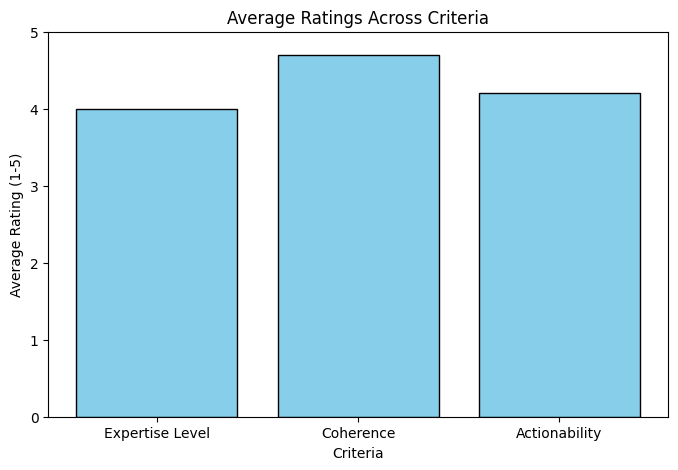

In [ ]:
import matplotlib.pyplot as plt

# Data for the plot
criteria = ['Expertise Level', 'Coherence', 'Actionability']
average_ratings = [4.0, 4.7, 4.2]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(criteria, average_ratings, color='skyblue', edgecolor='black')
plt.ylim(0, 5)
plt.axhline(5, color='gray', linestyle='--', linewidth=0.5)  # Maximum rating line
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Minimum rating line
plt.title('Average Ratings Across Criteria')
plt.ylabel('Average Rating (1-5)')
plt.xlabel('Criteria')
plt.show()


Training Black-Box Model (Isolation Forest)...

Black-Box Model Evaluation:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44        21
           1       0.93      0.94      0.94       179

    accuracy                           0.89       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.88      0.89      0.88       200


Training Interpretable Model (Decision Tree)...

XAI Model Evaluation:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95        21
           1       0.99      1.00      0.99       179

    accuracy                           0.99       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200


Explaining Black-Box Model Predictions...

SHAP Summary Plot for Black-Box Model:


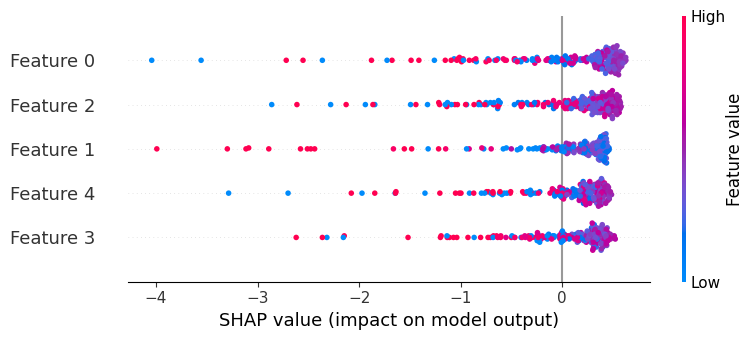


SHAP Force Plot for a single prediction (sample 0):

Explaining XAI Model...


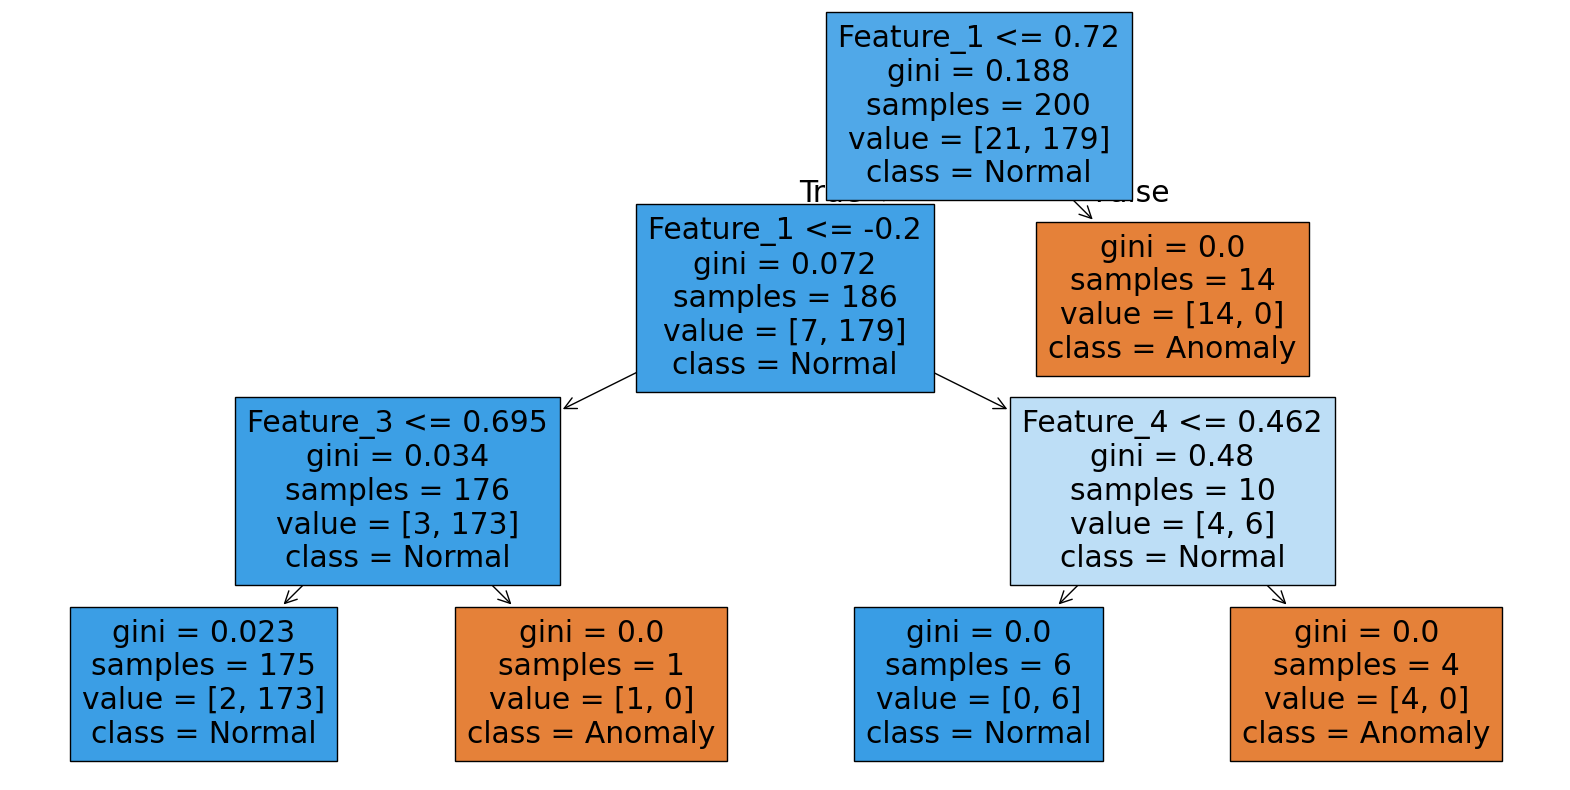

In [ ]:
# Implementing anomaly detection using online synthetic data

from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import shap

# Step 1: Generate synthetic data
# Creating a small dataset with anomalies
X, y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalance to simulate anomalies
    random_state=42
)

# Convert the binary labels (0, 1) into anomaly format (1 for normal, -1 for anomaly)
y = [1 if label == 0 else -1 for label in y]

# Step 2: Black-box model (Isolation Forest)
print("Training Black-Box Model (Isolation Forest)...")
blackbox_model = IsolationForest(random_state=42, contamination=0.1)
blackbox_model.fit(X)
y_pred_blackbox = blackbox_model.predict(X)

# Evaluation
print("\nBlack-Box Model Evaluation:")
print(classification_report(y, y_pred_blackbox))

# Step 3: XAI Model (Decision Tree for interpretability)
print("\nTraining Interpretable Model (Decision Tree)...")
xai_model = DecisionTreeClassifier(max_depth=3, random_state=42)
xai_model.fit(X, y)

y_pred_xai = xai_model.predict(X)

# Evaluation
print("\nXAI Model Evaluation:")
print(classification_report(y, y_pred_xai))

# Step 4: Explainability for Black-box Model (using SHAP)
print("\nExplaining Black-Box Model Predictions...")
explainer = shap.TreeExplainer(blackbox_model)
shap_values = explainer.shap_values(X)

# Visualizing explanations for a few samples
print("\nSHAP Summary Plot for Black-Box Model:")
shap.summary_plot(shap_values, X)

print("\nSHAP Force Plot for a single prediction (sample 0):")
shap.force_plot(explainer.expected_value, shap_values[0], X[0])

# Visualizing Decision Tree (Interpretable Model)
print("\nExplaining XAI Model...")
plt.figure(figsize=(20, 10))
plot_tree(xai_model, feature_names=[f"Feature_{i}" for i in range(X.shape[1])],
          class_names=["Anomaly", "Normal"], filled=True)
plt.show()


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=932a299fef19bdc249da7e256fef86141f59459b3d15248d65b503ce26a923f1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Training Black-Box Model (Isolation Forest)...

Black-Box Model Evaluation:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44        21
           1       0.93      0.94      0.94       179

    accuracy                           0.89       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.88      0.89      0.88       200


Training Interpretable Model (Decision Tree)...

XAI Model Evaluation:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95        21
           1       0.99      1.00      0.99       179

    accuracy                           0.99       200
   macro avg       0.99      0.95      0.97       200
weighted avg       0.99      0.99      0.99       200


Using LIME for explaining Black-Box Model predictions...
Intercept 0.5137226369744434
Prediction_local [0.51454623]
Right: 0.5205943461695934



Visualizing the Decision Tree...


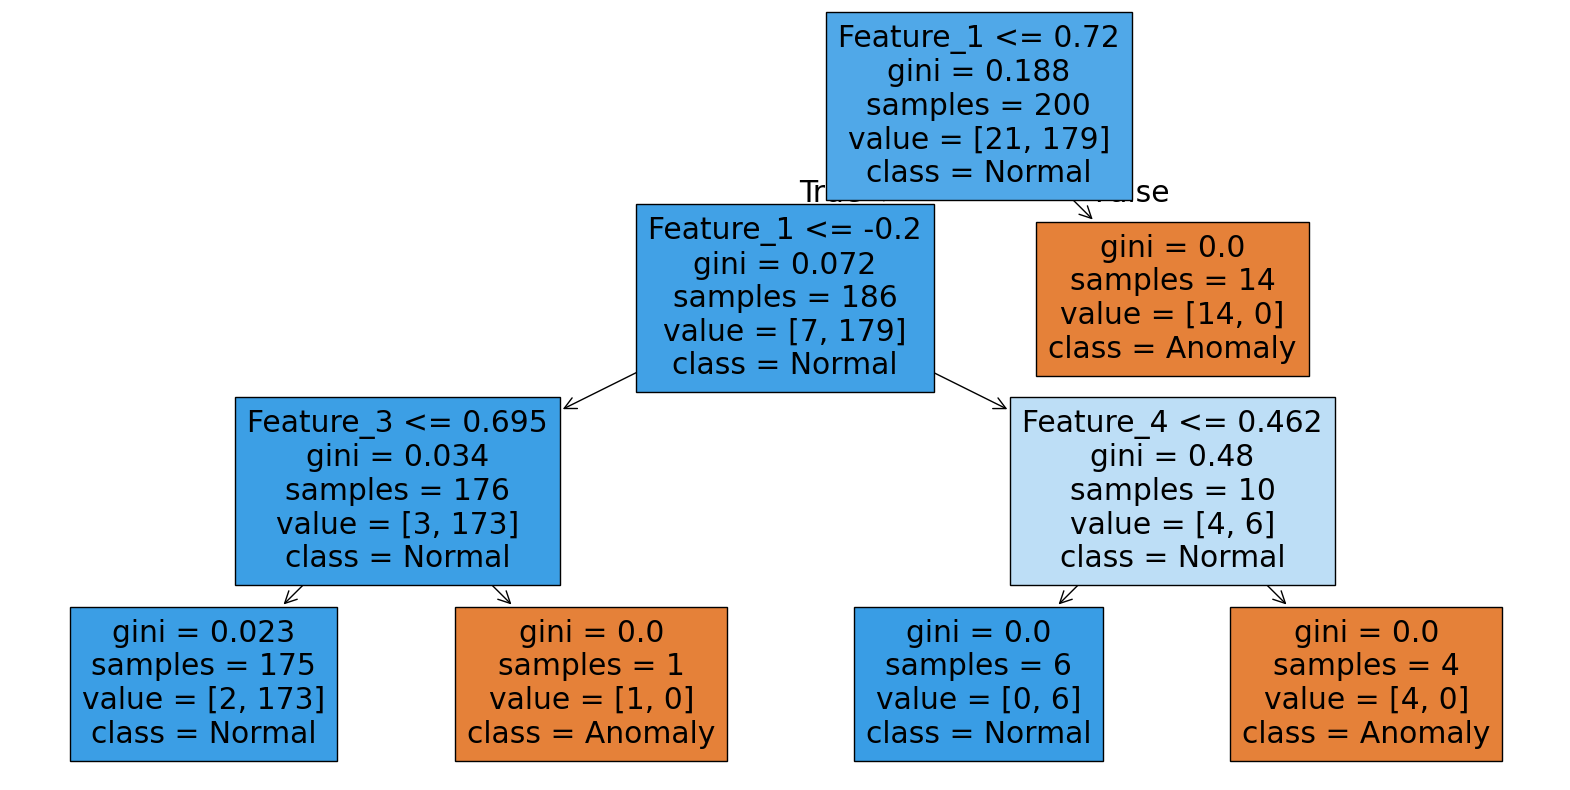

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Step 1: Generate synthetic data
# Creating a small dataset with anomalies
X, y = make_classification(
    n_samples=200,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalance to simulate anomalies
    random_state=42
)

# Convert the binary labels (0, 1) into anomaly format (1 for normal, -1 for anomaly)
y = [1 if label == 0 else -1 for label in y]

# Step 2: Black-box model (Isolation Forest)
print("Training Black-Box Model (Isolation Forest)...")
blackbox_model = IsolationForest(random_state=42, contamination=0.1)
blackbox_model.fit(X)
y_pred_blackbox = blackbox_model.predict(X)

# Convert decision function to probabilities
def isolation_forest_predict_proba(X):
    # Decision function output as an anomaly score
    scores = blackbox_model.decision_function(X)
    # Transform scores into probabilities using a logistic function
    probabilities = 1 / (1 + np.exp(-scores))
    return np.vstack([1 - probabilities, probabilities]).T

# Evaluation
print("\nBlack-Box Model Evaluation:")
print(classification_report(y, y_pred_blackbox))

# Step 3: XAI Model (Decision Tree for interpretability)
print("\nTraining Interpretable Model (Decision Tree)...")
xai_model = DecisionTreeClassifier(max_depth=3, random_state=42)
xai_model.fit(X, y)

y_pred_xai = xai_model.predict(X)

# Evaluation
print("\nXAI Model Evaluation:")
print(classification_report(y, y_pred_xai))

# Step 4: LIME for explaining Black-box model predictions
print("\nUsing LIME for explaining Black-Box Model predictions...")
lime_explainer = LimeTabularExplainer(
    training_data=X,
    mode="classification",
    feature_names=[f"Feature_{i}" for i in range(X.shape[1])],
    class_names=["Anomaly", "Normal"],
    verbose=True,
    random_state=42
)

# Explain a single instance (e.g., instance 0)
instance_to_explain = 0
explanation = lime_explainer.explain_instance(
    data_row=X[instance_to_explain],
    predict_fn=isolation_forest_predict_proba
)

# Display explanation
explanation.show_in_notebook(show_table=True)

# Visualizing Decision Tree (Interpretable Model)
print("\nVisualizing the Decision Tree...")
plt.figure(figsize=(20, 10))
plot_tree(
    xai_model,
    feature_names=[f"Feature_{i}" for i in range(X.shape[1])],
    class_names=["Anomaly", "Normal"],
    filled=True
)
plt.show()
